In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 1
# Загрузите датасет transaction_data.csv. 
# Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
# Вопрос: сколько в датасете пропущенных значений?

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/lesson5/transaction_data.csv')

In [4]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [5]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [6]:
df.isna().sum().sum()

0

In [7]:
# 2
# Проверьте, какие значения принимает колонка transaction . 
# Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.
# Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [8]:
count_transaction = df.groupby('transaction', as_index = False).agg(count = ('transaction', 'count'))

In [9]:
count_transaction

,transaction,count
0,cancelled,1619
1,error,4
2,successfull,3692


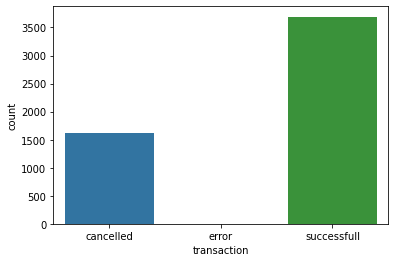

In [10]:
sns.barplot(x = 'transaction', y = 'count', data = count_transaction)

In [11]:
# 6
# Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull
# Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где
# по оси x – число транзакций
# по оси y – доля пользователей с таким числом транзакций
# Выберите верные утверждения.

In [12]:
users_count_successfull = df.query('transaction == "successfull"'). groupby('name', as_index = False).agg(count_success = ('transaction', 'count'))

In [13]:
users_count_successfull

,name,count_success
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68
5,Ekaterina_Polyanova,68
6,Ekaterina_Smirnova,77
7,Irina_Fedorova,62
8,Irina_Ivanova,60
9,Irina_Lesnova,76


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


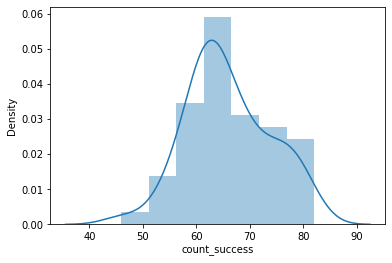

In [14]:
sns.distplot(users_count_successfull.count_success)

In [15]:
users_count_successfull.describe()

,count_success
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [ ]:
# 7
# К вам пришёл коллега с немного обновленными данными. 
# Постройте сводную таблицу user_vs_minute_pivot, где:

# столбцы – имена пользователей
# строки – минута времени осуществления операции (minute)
# значения – число совершённых операций

# Пропущенные значения заполните нулями.
# Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.

In [16]:
df_updated = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/lesson5/transaction_data_updated.csv')

In [18]:
df_updated.shape

(5315, 4)

In [20]:
df_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [21]:
df_updated.isna().sum().sum()

0

In [28]:
df_updated_for_pivot = df_updated.groupby(['name', 'minute'], as_index = False).agg(count_transaction = ('transaction', 'count'))


In [29]:
df_updated_for_pivot

,name,minute,count_transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [36]:
user_vs_minute_pivot = df_updated_for_pivot.pivot(index = 'minute', columns = 'name', values='count_transaction')

In [32]:
df_updated_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [40]:
df_updated_pivot.shape

(60, 56)

In [37]:
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)

In [38]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [ ]:
# 8
# Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки.
# Как вы думаете, из-за чего мы видим такую картину? Произошла ошибка, или с данными всё хорошо?

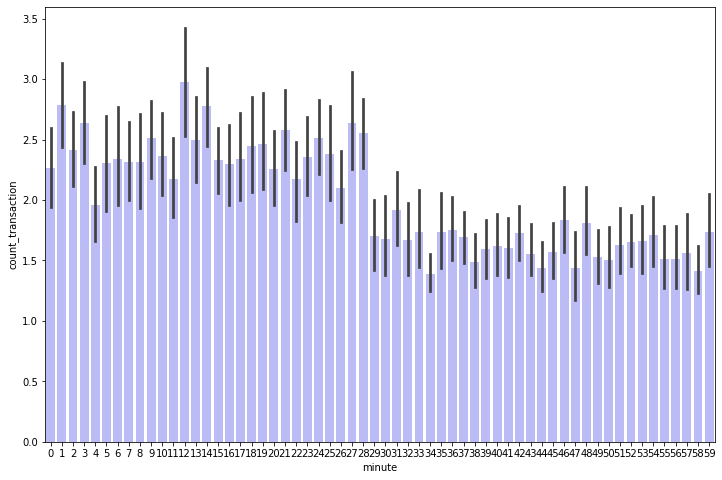

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(x='minute', y='count_transaction', data=df_updated_for_pivot, color = 'blue', alpha = 0.3)

In [ ]:
# Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, 
# прошедших с начала дня. Результат сохраните в колонку true_minute. 
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [47]:
df_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [49]:
df_updated.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [52]:
df_updated ['date'] = pd.to_datetime(df_updated.date)

In [53]:
df_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [56]:
df_updated.date.dt.hour

0       0
1       0
2       1
3       0
4       0
       ..
5310    0
5311    0
5312    0
5313    0
5314    1
Name: date, Length: 5315, dtype: int64

In [63]:
df_updated.date.dt.minute

0       37
1       59
2        6
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    15
Name: date, Length: 5315, dtype: int64

In [64]:
df_updated = df_updated.assign(true_minute = df_updated.date.dt.hour*60 + df_updated.date.dt.minute)

In [65]:
df_updated.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [66]:
df_updated_for_hist = df_updated.groupby(['name', 'true_minute'], as_index = False).agg(count_transaction = ('transaction', 'count'))

In [67]:
df_updated_for_hist

,name,true_minute,count_transaction
0,Ekaterina_Fedorova,0,1
1,Ekaterina_Fedorova,1,1
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,2
4,Ekaterina_Fedorova,4,2
...,...,...,...
3306,Vasilisa_Smirnova,82,2
3307,Vasilisa_Smirnova,85,1
3308,Vasilisa_Smirnova,86,1
3309,Vasilisa_Smirnova,87,2


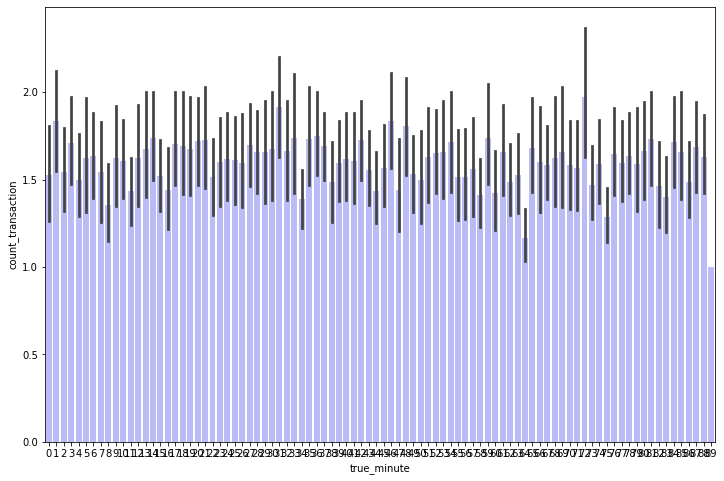

In [68]:
plt.figure(figsize=(12, 8))
sns.barplot(x='true_minute', y='count_transaction', data=df_updated_for_hist, color = 'blue', alpha = 0.3)